### Compare CONUS2 and USGS streamflow ###
DTT, 10/22

This notebook reads in CSVs of CONUS2 daily mean flow [cms] and daily mean USGS flow [cms] and creates comparison hydrographs. Gages have been matched between the two csv's to make sure that we're comparing viable gage locations in `1_Organize_Streamflow.ipynb`. 

Inputs:
- CONUS2 daily mean flow csv in [cms], ouput from `1_Organize_Streamflow.ipynb`
- USGS daily mean flow csv in [cms], ouput from `1_Organize_Streamflow.ipynb` 
- USGS gage metadata csv, ouput from `1_Organize_Streamflow.ipynb` 

Outputs:
- Hydrographs of USGS and CONUS2 flow

Notes:
- as of 11/22 there are no stats included in these hydrographs. Need to either add a calculation here or pull from the SaveStreamflowStats.ipynb and add these to the plots

In [2]:
import sys
from parflow.tools.io import read_pfb,write_pfb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataretrieval import nwis
from IPython.display import display

In [13]:
water_year = 2003
directory_out = '/glade/p/univ/ucsm0002/CONUS2/CONUS2.spinup.WY2003/averages'
# Directory containing output csv's from `Make_CONUS2_streamflow_csv.py`
organized_dir = '/glade/work/tijerina/PFCONUS2-analysis/scripts/Validation/Streamflow/Organized_Daily_Flow'
# Where you want to save plots, etc. to
plot_dir = '/glade/work/tijerina/PFCONUS2-analysis/scripts/Validation/Streamflow/Figures'

# names of csv files
usgs_csv = 'FlowMatch_USGS_daily_cms_2003.csv'
pf_csv = 'FlowMatch_CONUS2_daily_cms_2003.csv'
metadata_csv = 'FlowMatch_metadata_2003.csv'

no_days = 364
NX = 4018
NY = 1955

### Read CONUS2 streamflow at Delaware

In [15]:
### set up pandas dataframe of gage ID, lat/long, CONUS2 x and y indices ###
pf_flow_df = np.zeros(len(range(no_days)))

In [16]:
for i in range(no_days):
    step = str(int(i+1)).rjust(3, '0')
    pf_flow_pfb = np.squeeze(read_pfb(f'{directory_out}/flow.2003.daily.{step}.pfb'))
    pf_flow_df[i] = pf_flow_pfb[NY,NX]/3600/24
    print(f'reading flow for day {step}')
# # Read in CONUS2 daily streamflow PFBs and save as df in flow_df, convert to total accumulated in m^3/h to mean daily in cms
# for i in range(364):
#     step = str(int(i+1)).rjust(3, '0')
#     pf_flow_pfb = np.squeeze(read_pfb(f'{directory_out}/flow.2003.daily.{step}.pfb'))
#     #pf_flow_df = pf_flow_pfb[pf_flow_df['1955'],pf_flow_df['4018']]/3600/24 # CONVERT FROM m^3/h to cms AND from daily accumulated to daily mean
#     print(f'reading flow for day {step} and converting from total accumulated flow in m^3/h, to daily mean flow in cms')


reading SWE for day 001
reading SWE for day 002
reading SWE for day 003
reading SWE for day 004
reading SWE for day 005
reading SWE for day 006
reading SWE for day 007
reading SWE for day 008
reading SWE for day 009
reading SWE for day 010
reading SWE for day 011
reading SWE for day 012
reading SWE for day 013
reading SWE for day 014
reading SWE for day 015
reading SWE for day 016
reading SWE for day 017
reading SWE for day 018
reading SWE for day 019
reading SWE for day 020
reading SWE for day 021
reading SWE for day 022
reading SWE for day 023
reading SWE for day 024
reading SWE for day 025
reading SWE for day 026
reading SWE for day 027
reading SWE for day 028
reading SWE for day 029
reading SWE for day 030
reading SWE for day 031
reading SWE for day 032
reading SWE for day 033
reading SWE for day 034
reading SWE for day 035
reading SWE for day 036
reading SWE for day 037
reading SWE for day 038
reading SWE for day 039
reading SWE for day 040
reading SWE for day 041
reading SWE for 

In [17]:
np.savetxt(f'{organized_dir}/PFCLM_meanFlow_WY2003_DelawareTrenton_01463500.csv', pf_flow_df, delimiter=",")

In [18]:
pf_flow_df

array([1.07716302e+00, 8.02061297e-01, 6.19720313e-01, 5.81053022e-01,
       5.64693187e-01, 3.71624477e-01, 2.73522642e-01, 2.00851235e-01,
       1.55711552e-01, 2.83464993e-01, 4.30424289e+00, 8.25924937e+00,
       6.21610519e+00, 5.88247198e+00, 6.53786097e+00, 6.48733376e+00,
       6.34467279e+00, 5.31870038e+00, 4.17458256e+00, 3.26679876e+00,
       2.57671823e+00, 2.05022639e+00, 1.64327704e+00, 1.32441404e+00,
       1.14018250e+00, 5.39260326e+00, 3.37682597e+00, 2.84440551e+00,
       2.77512657e+00, 3.51463373e+00, 3.52576762e+00, 2.95440511e+00,
       2.56445337e+00, 2.23834359e+00, 1.96760178e+00, 1.81881301e+00,
       3.76393390e+00, 2.56778011e+00, 2.15976052e+00, 1.86997446e+00,
       1.65008709e+00, 1.46844179e+00, 1.74146480e+00, 4.18259875e+00,
       3.14551962e+00, 2.76052838e+00, 2.74117584e+00, 7.91605969e+00,
       1.01326491e+01, 8.37222223e+00, 7.43706337e+00, 6.54401441e+00,
       6.74493053e+00, 6.32942145e+00, 4.89285563e+00, 3.94511524e+00,
      

### Delaware at Trenton

In [73]:
# Set the parameters needed to retrieve data
siteNumber = "01463500" # Delaware at Trenton
parameterCode = "00060" # Discharge
startDate = "2002-10-01"
endDate = "2003-09-30"

# Retrieve the data
dailyStreamflow = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start=startDate, end=endDate) 
print("Retrieved " + str(len(dailyStreamflow[0])) + " data values.")

Retrieved 365 data values.


In [74]:
# Display the data frame as a table
display(dailyStreamflow[0])

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
2002-10-01 00:00:00+00:00,5530.0,A,01463500
2002-10-02 00:00:00+00:00,4430.0,A,01463500
2002-10-03 00:00:00+00:00,3590.0,A,01463500
2002-10-04 00:00:00+00:00,3160.0,A,01463500
2002-10-05 00:00:00+00:00,3130.0,A,01463500
...,...,...,...
2003-09-26 00:00:00+00:00,37200.0,A,01463500
2003-09-27 00:00:00+00:00,30100.0,A,01463500
2003-09-28 00:00:00+00:00,29300.0,A,01463500


In [75]:
usgs_cms = dailyStreamflow[0]['00060_Mean']*0.028316847

In [76]:
usgs_cms_array = np.array(usgs_cms)
usgs_cms_array

array([ 156.59216391,  125.44363221,  101.65748073,   89.48123652,
         88.63173111,   91.46341581,  112.41788259,   99.95846991,
         90.89707887,   94.86143745,  132.52284396,  546.5151471 ,
        702.2578056 ,  676.7726433 ,  501.2081919 ,  416.2576509 ,
        634.2973728 , 1027.9015461 ,  826.8519324 ,  572.0003094 ,
        470.0596602 ,  399.2675427 ,  342.6338487 ,  288.8318394 ,
        248.90508513,  267.02786721,  334.1387946 ,  362.4556416 ,
        342.6338487 ,  319.9803711 ,  311.485317  ,  288.8318394 ,
        265.89519333,  243.80805267,  230.21596611,  215.49120567,
        219.45556425,  227.95061835,  249.47142207,  251.45360136,
        248.90508513,  227.10111294,  225.11893365,  294.4952088 ,
        305.8219476 ,  351.1289028 ,  325.6437405 ,  580.4953635 ,
        855.1687794 ,  971.2678521 ,  863.6638335 ,  713.5845444 ,
        603.1488411 ,  594.653787  ,  591.8221023 ,  566.33694   ,
        501.2081919 ,  461.5646061 ,  438.9111285 ,  404.93091

### Compare CONUS2 to USGS

In [87]:
pf_flow = pd.read_csv('Organized_Daily_Flow/PFCLM_meanFlow_WY2003_DelawareTrenton_01463500.csv', header=None)*240

In [88]:
pf_flow

,0
0,258.519124
1,192.494711
2,148.732875
3,139.452725
4,135.526365
...,...
359,0.000000
360,0.000000
361,0.000000
362,633.684787


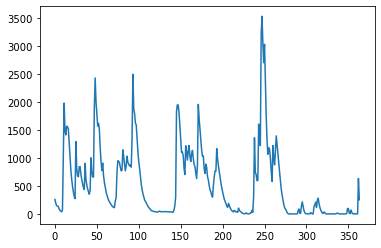

In [89]:
plt.plot(pf_flow)
#plt.plot(usgs_cms)

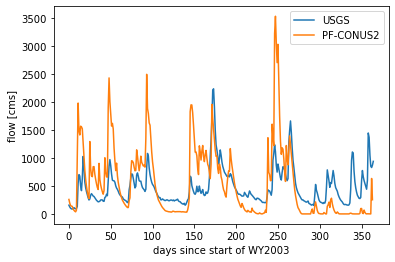

In [93]:
plt.plot(usgs_cms_array, label = 'USGS')
plt.plot(pf_flow, label = 'PF-CONUS2')
plt.ylabel('flow [cms]')
plt.xlabel('days since start of WY2003')
plt.legend()
plt.savefig('flow_PFCONUS2_WY2003_Delaware_Trenton.png', dpi = 200)

In [5]:
### read in CONUS2 daily flow matched csv
pfdata = pd.read_csv(f'{organized_dir}/{pf_csv}',index_col=['site_id'])
pf_flow_matched = pfdata.drop(columns=['USGS_lat', 'USGS_lon', 'x_new_adj', 'y_new_adj'])
pf_flow_matched.head()

,day 001,day 002,day 003,day 004,day 005,day 006,day 007,day 008,day 009,day 010,...,day 022,day 023,day 024,day 025,day 026,day 027,day 028,day 029,day 030,day 031
site_id,,,,,,,,,,,,,,,,,,,,,
1011000,37.266464,34.151593,31.949418,28.746042,24.794453,21.037749,17.725660,14.927488,12.823219,11.328315,...,26.366490,42.798333,53.046882,43.618294,34.649396,32.664747,28.395134,27.141300,25.504890,25.276254
1013500,18.686342,17.994405,17.171830,14.470901,14.358695,12.452931,11.061765,10.040905,9.119768,8.499280,...,25.460269,25.297993,25.892275,26.625347,25.821571,29.422915,27.471481,23.582704,20.091685,17.376020
1015800,30.468728,29.614383,27.459663,24.822553,22.551353,19.456863,16.647201,14.524086,12.689513,11.405875,...,58.912677,71.743174,63.942664,52.078266,42.038084,36.339844,30.665801,28.090918,26.373447,24.965231
1017000,64.752051,64.284799,62.117018,57.702024,52.771326,48.076338,43.703179,39.512687,35.268489,31.090277,...,67.899391,94.396899,100.104568,110.776426,108.378785,96.324758,83.791588,75.230466,67.490577,59.051520
1017550,0.044492,0.028687,0.010159,0.003003,0.004380,0.001411,0.000000,0.000000,0.000000,0.000036,...,0.155844,0.092079,0.059114,0.039842,0.053557,0.127573,0.071467,0.049377,0.033976,0.025259


In [4]:
### read in USGS daily flow matched csv
usgs_flow_matched = pd.read_csv(f'{organized_dir}/{usgs_csv}',index_col=['site_id']) 
usgs_flow_matched.head()

,2002-10-01,2002-10-02,2002-10-03,2002-10-04,2002-10-05,2002-10-06,2002-10-07,2002-10-08,2002-10-09,2002-10-10,...,2002-10-22,2002-10-23,2002-10-24,2002-10-25,2002-10-26,2002-10-27,2002-10-28,2002-10-29,2002-10-30,2002-10-31
site_id,,,,,,,,,,,,,,,,,,,,,
1011000,7.414600,7.386300,6.990100,6.565600,6.36750,6.19770,5.744900,5.065700,4.528000,4.414800,...,9.310700,8.57490,8.546600,8.631500,9.820100,12.508600,15.508400,16.52720,15.791400,14.319800
1013500,3.509200,3.424300,3.169600,3.113000,3.33940,2.85830,2.858300,2.631900,2.405500,2.504550,...,5.263800,5.40530,5.660000,5.914700,6.197700,6.990100,7.556100,7.30140,7.188200,7.273100
1015800,6.707100,6.226000,5.716600,5.377000,5.15060,5.03740,4.754400,4.499700,4.160100,4.188400,...,22.300400,19.07420,16.725300,14.914100,13.725500,12.904800,12.848200,13.72550,13.725500,13.074600
1017000,9.876700,9.367300,8.461700,7.952300,7.81080,7.13160,7.046700,6.678800,6.282600,6.282600,...,38.205000,33.39400,28.583000,24.507800,21.762700,20.376000,20.715600,21.79100,21.734400,20.347700
1017550,0.023772,0.024338,0.020659,0.018395,0.01981,0.01981,0.018678,0.018678,0.018961,0.021791,...,0.044997,0.03679,0.036224,0.035092,0.030847,0.041884,0.051789,0.03962,0.031979,0.027451


In [5]:
### read in USGS streamflow gage metadata for all gages with flow in October
usgs_gage_metadata = pd.read_csv(f'{organized_dir}/{metadata_csv}',index_col=['site_id'])#, 
#usgs_gage_metadata = usgs_gage_metadata.drop(columns=['Unnamed: 0'])
#usgs_all_gages = usgs_all_gages.transpose() #transpose df for easier plotting
usgs_gage_metadata.head()

,site_type,agency,site_name,site_id_agency,site_query_url,site_query_access_date,latitude,longitude,state,huc,...,basin_cd,topo_cd,instruments_cd,construction_dt,inventory_dt,drain_area_va,contrib_drain_area_va,local_time_fg,reliability_cd,project_no
site_id,,,,,,,,,,,,,,,,,,,,,
1011000,stream gauge,USGS,"Allagash River near Allagash, Maine",1011000,https://waterservices.usgs.gov/nwis/site/?form...,2022-08-30,47.069722,-69.079444,ME,1010002,...,NaN,NaN,YNNNYNNNNYNNNNNNYNNNNNNNNNNNNN,NaN,NaN,1478.00,1229.00,Y,NaN,442300100.0
1013500,stream gauge,USGS,"Fish River near Fort Kent, Maine",1013500,https://waterservices.usgs.gov/nwis/site/?form...,2022-08-30,47.237500,-68.582778,ME,1010003,...,NaN,NaN,YNNNYNYNNYNNNNNNYNNNNNNNNNNNNN,NaN,NaN,873.00,873.00,Y,NaN,442300100.0
1015800,stream gauge,USGS,"Aroostook River near Masardis, Maine",1015800,https://waterservices.usgs.gov/nwis/site/?form...,2022-08-30,46.523056,-68.371667,ME,1010004,...,NaN,NaN,YNNNYNYNNYNNNNNNYNNNNNNNNNNNNN,NaN,NaN,892.00,892.00,Y,NaN,442300100.0
1017000,stream gauge,USGS,"Aroostook River at Washburn, Maine",1017000,https://waterservices.usgs.gov/nwis/site/?form...,2022-08-30,46.777222,-68.157222,ME,1010004,...,NaN,NaN,YNNNYNYNNYNNNNNNYNNNNNNNNNNNNN,NaN,NaN,1654.00,1654.00,Y,NaN,442300100.0
1017550,stream gauge,USGS,"Williams Brook at Phair, Maine",1017550,https://waterservices.usgs.gov/nwis/site/?form...,2022-08-30,46.628056,-67.953056,ME,1010005,...,NaN,NaN,YNNNYNYNNYNNNNNNYNNNNNNNNNNNNN,NaN,NaN,3.82,3.82,Y,NaN,442300100.0


In [6]:
### Make a plot of CONUS2 vs observed
xlength = range(31)

for i in range(len(usgs_flow_matched.index)):
    gage = usgs_flow_matched.index[i]
    station_name = usgs_gage_metadata['site_name'][gage]
    
    # make hydrographs
    fig, ax = plt.subplots(figsize=(7,5), dpi = 300)
    ax.plot(xlength, pf_flow_matched.loc[gage],label= 'CONUS2')
    ax.plot(xlength, usgs_flow_matched.loc[gage],label= 'USGS')
    ax.set_ylabel('flow [cms]')
    plt.xlabel('Days')
    plt.title(f'Mean Daily Flow - {station_name} [cms]')
    ax.legend()
    plt.savefig(f'{plot_dir}/Timeseries_oct_WY2003/Timeseries_{usgs_flow_matched.index[i]}_cms.png')
    plt.close()